<h1 style="text-align: center;"><strong>Prediction of Viral Load Suppression Project</strong></h1>

<p style="text-align: center;"><strong>Degninou Yehadji</strong><br /><span style="color: #0000ff;">TU Dublin, Blanchardstown Campus</span><br /><span style="color: #0000ff;">Dublin 15</span><br /><span style="color: #0000ff;"><em>Email: <a href="mailto:degninou.yehadji@fulbrightmail.org">B00108474@mytudublin.ie</a></em></span> </p>

This is a project conducted using an HIV treatement dataset to predict viral load supression for individuals in the cohort. 

The target variable is Last ART VL Count recoded into a binary variable indicating whether the individual has viral load suppressed or not. The threshold of < 1000 RNA copies/ml is used to define suppressed viral load. 

This Python script is develloped to meet the objective presented above. Specifically, it is intended to: 
- Perform data management tasks on the original dataset 
- Show visualisations of the data using the Python plotting tools
- Develop and evaluate 3 classification models to predict viral load supression 
- Perform cross validation (use k-fold cross validation)
- Perform some searching for optimal values of the hyper or tuning parameters (see GridSearchCV and/or RandomizedSearchCV) in scikit-learn.
- Show the performance of the models by generating classification reports/confusion matrices, ROC curves etc.
- Comment on the process as a whole and in particular on the result of the estimation.

## Import required packages 

In [1]:
# Import required packages 

import os

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
import scikitplot as skplt

import pickle
import joblib

from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import RocCurveDisplay

import missingno as msno 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import xlrd

### Set working directory and load dataset

In [2]:
os.chdir ("..\..\MCS Thesis\Modeling")
data_train01 = pd.read_excel('data_train_clean.xlsx')
data_test01 = pd.read_excel('data_test_clean.xlsx')

data_train02 = data_train01.copy()
data_test02 = data_test01.copy()

In [3]:
data_train02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16793 entries, 0 to 16792
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Gender_Male                                16793 non-null  int64
 1   Regiment schedule_3-Month                  16793 non-null  int64
 2   Regiment schedule_6-Month                  16793 non-null  int64
 3   Regiment schedule_Regular                  16793 non-null  int64
 4   Prior ART_Naive                            16793 non-null  int64
 5   Method into ART_New                        16793 non-null  int64
 6   TB Rx Started_Yes                          16793 non-null  int64
 7   TPT Outcome_No treatement                  16793 non-null  int64
 8   TPT Outcome_Other                          16793 non-null  int64
 9   TPT Outcome_Rx completed                   16793 non-null  int64
 10  Regimen At Baseline_1S3E                   167

In [4]:
data_test02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Gender_Male                                4054 non-null   int64
 1   Regiment schedule_3-Month                  4054 non-null   int64
 2   Regiment schedule_6-Month                  4054 non-null   int64
 3   Regiment schedule_Regular                  4054 non-null   int64
 4   Prior ART_Naive                            4054 non-null   int64
 5   Method into ART_New                        4054 non-null   int64
 6   TB Rx Started_Yes                          4054 non-null   int64
 7   TPT Outcome_No treatement                  4054 non-null   int64
 8   TPT Outcome_Other                          4054 non-null   int64
 9   TPT Outcome_Rx completed                   4054 non-null   int64
 10  Regimen At Baseline_1S3E                   4054 

### Create predictors and targets - Training and Test

In [5]:
# Create a subset with potential predictors - Training set
xtrain = data_train02[['Gender_Male',
'Regiment schedule_3-Month',
'Regiment schedule_6-Month',
'Regiment schedule_Regular',
'Prior ART_Naive',
'Method into ART_New',
'TB Rx Started_Yes',
'TPT Outcome_No treatement',
'TPT Outcome_Other',
'TPT Outcome_Rx completed',
'Regimen At Baseline_1S3E',
'Regimen At Baseline_1S3N',
'Regimen At Baseline_1T3E',
'Regimen At Baseline_1T3N',
'Regimen At Baseline_1Z3N',
'Regimen At Baseline_Other',
'Last ART Prescription_1T3E',
'Last ART Prescription_1T3O',
'Last ART Prescription_1Z3N',
'Last ART Prescription_2T3L',
'Last ART Prescription_2Z3L',
'Last ART Prescription_Other',
'Facility_CMC Coléah',
'Facility_CMC Flamboyants',
'Facility_CMC Matam',
'Facility_CMC Minière',
'Facility_CS Dabompa',
'Facility_CS Gbessia port 1',
'Facility_CS Tombolia',
'Facility_CS Wanidara',
'TB Status At Last Visit_No symptoms',
'TB Status At Last Visit_Not Screened',
'TB Status At Last Visit_Other',
'TB Status At Last Visit_Screening Unknown',
'CPT at ART Start_Yes',
'Second Line Rx_Yes',
'Baseline CD4',
'Last Pre-ART CD4',
'Last ART CD4',
'Last Pre-ART Stage',
'Stage at ART Start',
'Age At ART Start',
'Current Age',
'Duration on ART (months)']]

# Create a subset with potential predictors - Test set 
xtest = data_test02[['Gender_Male',
'Regiment schedule_3-Month',
'Regiment schedule_6-Month',
'Regiment schedule_Regular',
'Prior ART_Naive',
'Method into ART_New',
'TB Rx Started_Yes',
'TPT Outcome_No treatement',
'TPT Outcome_Other',
'TPT Outcome_Rx completed',
'Regimen At Baseline_1S3E',
'Regimen At Baseline_1S3N',
'Regimen At Baseline_1T3E',
'Regimen At Baseline_1T3N',
'Regimen At Baseline_1Z3N',
'Regimen At Baseline_Other',
'Last ART Prescription_1T3E',
'Last ART Prescription_1T3O',
'Last ART Prescription_1Z3N',
'Last ART Prescription_2T3L',
'Last ART Prescription_2Z3L',
'Last ART Prescription_Other',
'Facility_CMC Coléah',
'Facility_CMC Flamboyants',
'Facility_CMC Matam',
'Facility_CMC Minière',
'Facility_CS Dabompa',
'Facility_CS Gbessia port 1',
'Facility_CS Tombolia',
'Facility_CS Wanidara',
'TB Status At Last Visit_No symptoms',
'TB Status At Last Visit_Not Screened',
'TB Status At Last Visit_Other',
'TB Status At Last Visit_Screening Unknown',
'CPT at ART Start_Yes',
'Second Line Rx_Yes',
'Baseline CD4',
'Last Pre-ART CD4',
'Last ART CD4',
'Last Pre-ART Stage',
'Stage at ART Start',
'Age At ART Start',
'Current Age',
'Duration on ART (months)']]

# Target -- Training set
ytrain = data_train02[['VL Suppressed_Yes']]
# Target -- Test set
ytest = data_test02[['VL Suppressed_Yes']]

## Support vector machine (SVM)

#### Parameter tunining - Gama

In [6]:
# Create SVM classifer object
SVM_classifier = svm.SVC()

parameters = {
    'gamma': ['scale', 'auto']
}

# 'kernel': ['poly', 'rbf']  
# 'gamma': ['scale', 'auto'],
# 'C': [0.1, 1, 10],
# Conduct Parameter Optmization 
# Create a grid search object
GS_SVM_classifier = GridSearchCV(SVM_classifier, parameters, n_jobs=-1, cv=3)
# Fit the grid search
GS_SVM_classifier.fit(xtrain, ytrain.values.ravel())

# Best paramete set
print('Best parameters found:\n', GS_SVM_classifier.best_params_)

Best parameters found:
 {'gamma': 'auto'}


In [7]:
# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(GS_SVM_classifier, xtrain, ytrain, cv=3, n_jobs=-1)
print(); print('Accuracy of the 3-fold CVs: ', CV_Result)
print(); print('Mean accuracy: ', CV_Result.mean())
print(); print('Standard deviation: ', CV_Result.std())


Accuracy of the 3-fold CVs:  [0.94158628 0.94551626 0.94229051]

Mean accuracy:  0.9431310164649741

Standard deviation:  0.001710947242051969


#### Parameter tunining - 'C': [5, 10, 20, 30, 40, 50, 60, 70, 90, 100, 110, 120, 130, 140]

In [8]:
# Create SVM classifer object
SVM_classifier = svm.SVC(gamma = 'auto')

parameters = {
    'C': [5, 10, 20, 30, 40, 50, 60, 70, 90, 100]
}

# 'kernel': ['poly', 'rbf']  
# 'gamma': ['scale', 'auto'],
# 'C': [0.1, 1, 5, 10],
# Conduct Parameter Optmization 
# Create a grid search object
GS_SVM_classifier = GridSearchCV(SVM_classifier, parameters, n_jobs=-1, cv=3)
# Fit the grid search
GS_SVM_classifier.fit(xtrain, ytrain.values.ravel())

# Best paramete set
print('Best parameters found:\n', GS_SVM_classifier.best_params_)

Best parameters found:
 {'C': 40}


In [9]:
# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(GS_SVM_classifier, xtrain, ytrain, cv=3, n_jobs=-1)
print(); print('Accuracy of the 3-fold CVs: ', CV_Result)
print(); print('Mean accuracy: ', CV_Result.mean())
print(); print('Standard deviation: ', CV_Result.std())


Accuracy of the 3-fold CVs:  [0.96891747 0.97302608 0.96748258]

Mean accuracy:  0.9698087104072856

Standard deviation:  0.0023492313135135543


#### Evaluate the model with optimal parameters on test set

In [10]:
# Create SVM classifer object with the optimal parameters
SVM_classifier = svm.SVC(C = 40, gamma = 'auto')

# Train the best SVM Classifer
SVM_classifier = SVM_classifier.fit(xtrain, ytrain.values.ravel())

# Save the model
joblib.dump(SVM_classifier, 'SVM_clf.pkl')

#Predict the response for test dataset
target_expected = ytest
target_predicted = SVM_classifier.predict(xtest)

# Area Under the Receiver Operating Characteristic Curve (ROC AUC)  
fpr, tpr, thresholds = metrics.roc_curve(target_expected, target_predicted)

# summarize the fit of the model
print('Classification report:\n', metrics.classification_report(target_expected, 
                                                                target_predicted))
print('F1 Score: ', metrics.f1_score(target_expected, target_predicted))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(target_expected, target_predicted))
print('Confusion matrix:\n', metrics.confusion_matrix(target_expected, target_predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.05      0.08       457
           1       0.89      0.98      0.93      3597

    accuracy                           0.87      4054
   macro avg       0.56      0.51      0.51      4054
weighted avg       0.82      0.87      0.84      4054

F1 Score:  0.9326095591155832
AUC:  0.5147387593235062
Accuracy Score:  0.8744449925999014
Confusion matrix:
 [[  23  434]
 [  75 3522]]


## Random Forest

### Determine max_depth

In [11]:
# Create the parameter grid based on the results of random search 
parameters = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
}# Create a based model
RF_classifier = RandomForestClassifier()# Instantiate the grid search model
GS_RF_classifier = GridSearchCV(RF_classifier, parameters, cv = 3, n_jobs = -1)

    #'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    #'min_samples_split': [150, 300, 450, 600, 750, 900, 1050],
    #'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 50],
    #'min_samples_leaf': [150, 300, 450, 600, 750, 900, 1050]

# Fit the grid search to the data
GS_RF_classifier.fit(xtrain, ytrain.values.ravel())

# Best paramete set
print('Best parameters found:\n', GS_RF_classifier.best_params_)

Best parameters found:
 {'max_depth': 30}


In [12]:
# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(GS_RF_classifier, xtrain, ytrain, cv=3, n_jobs=-1)
print(); print('Accuracy of the 3-fold CVs: ', CV_Result)
print(); print('Mean accuracy: ', CV_Result.mean())
print(); print('Standard deviation: ', CV_Result.std())


Accuracy of the 3-fold CVs:  [0.96623794 0.96409432 0.96373057]

Mean accuracy:  0.9646876104900528

Standard deviation:  0.001106262338712428


### Evaluate the model with optimal parameters on test set

In [13]:
# Create RF classifer object with the optimal parameters
RF_classifier = RandomForestClassifier(max_depth = 40)

# Train the best RF Classifer
RF_classifier = RF_classifier.fit(xtrain, ytrain.values.ravel())

# Save the model
joblib.dump(RF_classifier, 'RDF_clf.pkl')

#Predict the response for test dataset
target_expected = ytest
target_predicted = RF_classifier.predict(xtest)

# Area Under the Receiver Operating Characteristic Curve (ROC AUC)  
fpr, tpr, thresholds = metrics.roc_curve(target_expected, target_predicted)

# summarize the fit of the model
print('Classification report:\n', metrics.classification_report(target_expected, 
                                                                target_predicted))
print('F1 Score: ', metrics.f1_score(target_expected, target_predicted))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(target_expected, target_predicted))
print('Confusion matrix:\n', metrics.confusion_matrix(target_expected, target_predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.49      0.29      0.36       457
           1       0.91      0.96      0.94      3597

    accuracy                           0.89      4054
   macro avg       0.70      0.62      0.65      4054
weighted avg       0.87      0.89      0.87      4054

F1 Score:  0.9377200108313025
AUC:  0.6246994060817761
Accuracy Score:  0.8865318204242724
Confusion matrix:
 [[ 131  326]
 [ 134 3463]]


## Gaussian Naive Bayes

In [14]:
# Create Gaussian Naive Bayes (NB) classifer object
NB_classifier = GaussianNB()

# Train NB Classifer
NB_classifier = NB_classifier.fit(xtrain, ytrain.values.ravel())

# Save the model
joblib.dump(RF_classifier, 'NBY_clf.pkl')

#Predict the response for test dataset
target_expected = ytest
target_predicted = NB_classifier.predict(xtest)

# Area Under the Receiver Operating Characteristic Curve (ROC AUC)  
fpr, tpr, thresholds = metrics.roc_curve(target_expected, target_predicted)

# summarize the fit of the model
print('Classification report:\n', metrics.classification_report(target_expected, 
                                                                target_predicted))
print('F1 Score: ', metrics.f1_score(target_expected, target_predicted))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(target_expected, target_predicted))
print('Confusion matrix:\n', metrics.confusion_matrix(target_expected, target_predicted))

Classification report:
               precision    recall  f1-score   support

           0       0.32      0.56      0.41       457
           1       0.94      0.85      0.89      3597

    accuracy                           0.82      4054
   macro avg       0.63      0.71      0.65      4054
weighted avg       0.87      0.82      0.84      4054

F1 Score:  0.8930029154518949
AUC:  0.7069530954862093
Accuracy Score:  0.8189442525900346
Confusion matrix:
 [[ 257  200]
 [ 534 3063]]


### Logistic regression

In [15]:
# Create Logistic regression classifer object
LOGReg_classifier = LogisticRegression(random_state = 5, n_jobs = -1, max_iter = 50)

# Train Logistic regresion Classifer
LOGReg_classifier = LOGReg_classifier.fit(xtrain, ytrain.values.ravel())

# Save the model
joblib.dump(LOGReg_classifier, 'LGR_clf.pkl')

#Predict the response for test dataset
target_expected = ytest
target_predicted = LOGReg_classifier.predict(xtest)

# Area Under the Receiver Operating Characteristic Curve (ROC AUC)  
fpr, tpr, thresholds = metrics.roc_curve(target_expected, target_predicted)

# summarize the fit of the model
print('Classification report:\n', metrics.classification_report(target_expected, 
                                                                target_predicted))
print('F1 Score: ', metrics.f1_score(target_expected, target_predicted))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(target_expected, target_predicted))
print('Confusion matrix:\n', metrics.confusion_matrix(target_expected, target_predicted))
### 

Classification report:
               precision    recall  f1-score   support

           0       0.28      0.76      0.41       457
           1       0.96      0.75      0.84      3597

    accuracy                           0.75      4054
   macro avg       0.62      0.76      0.63      4054
weighted avg       0.88      0.75      0.79      4054

F1 Score:  0.8422368009996877
AUC:  0.7555007242237484
Accuracy Score:  0.7508633448445979
Confusion matrix:
 [[ 348  109]
 [ 901 2696]]


### ROC Curves

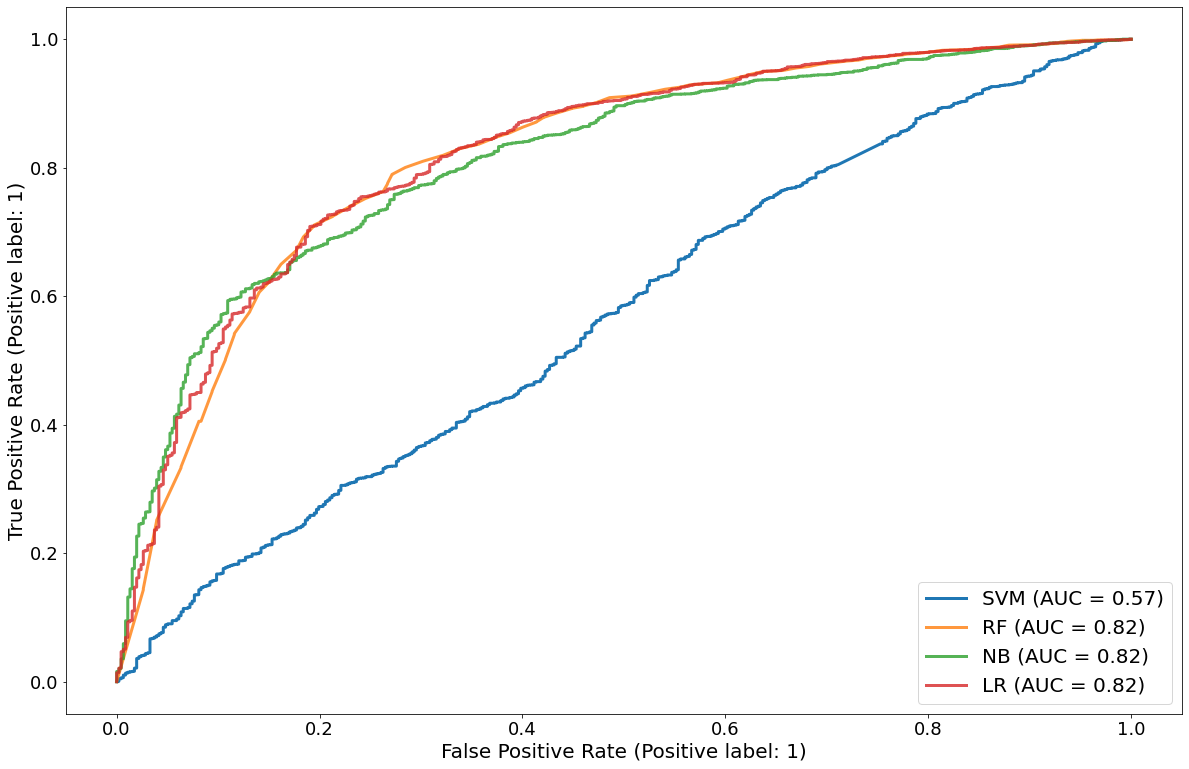

In [23]:
# SVM
SVM_class = svm.SVC(C = 40, gamma = 'auto')
SVM_class.fit(xtrain, ytrain.values.ravel())
ypred1 = SVM_class.decision_function(xtest)
svc_disp = RocCurveDisplay.from_predictions(ytest, ypred1, name="SVM")

# RandomForestClassifier
RF_class = RandomForestClassifier(max_depth = 55)
RF_class = RF_class.fit(xtrain, ytrain.values.ravel())
ypred2 = RF_class.predict_proba(xtest)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_predictions(ytest, ypred2[:,1], ax=ax, name="RF", alpha=0.8)

# Naive Bayes 
NB_class = GaussianNB()
NB_class = NB_class.fit(xtrain, ytrain.values.ravel())
ypred3 = NB_class.predict_proba(xtest)

ax = plt.gca()
nyb_disp = RocCurveDisplay.from_predictions(ytest, ypred3[:,1], ax=ax, name="NB", alpha=0.8)

# Logistic regression classifer object
LOGReg_class= LogisticRegression(random_state = 5, n_jobs = -1, max_iter = 50)
LOGReg_class = LOGReg_class.fit(xtrain, ytrain.values.ravel())
ypred4 = LOGReg_class.decision_function(xtest)

plt.rcParams['figure.figsize'] = [20, 13]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 20

ax = plt.gca()
lrg_disp = RocCurveDisplay.from_predictions(ytest, ypred4, ax=ax, name="LR", alpha=0.8)

### Stacking classifiers

['STK_clf1.pk4']

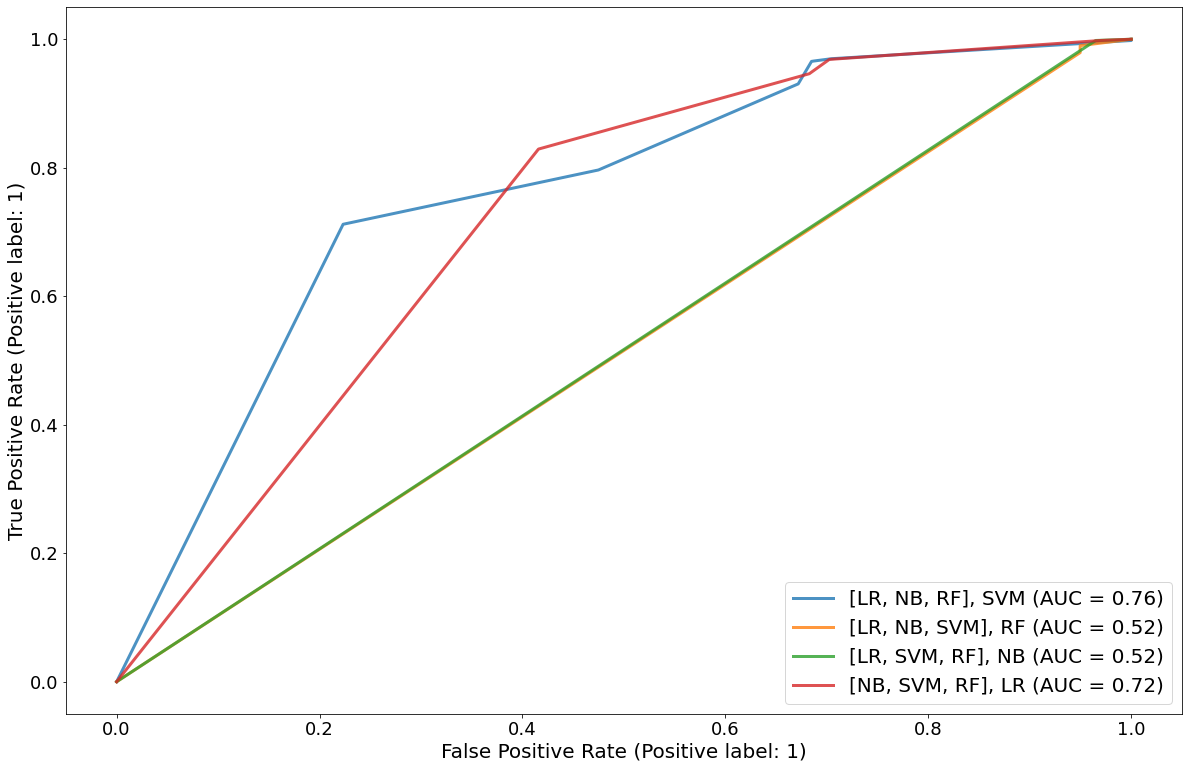

In [17]:
#Stacked classifier 
LOG_clf= LogisticRegression(random_state = 5, n_jobs = -1, max_iter = 50)
SVM_clf = svm.SVC(C = 40, gamma = 'auto')
RFR_clf = RandomForestClassifier(max_depth = 40)
NBY_clf = GaussianNB()

# [LOG_clf, NBY_clf, RFR_clf], SVM_clf Stacked classifier 
STK_clf1 = StackingClassifier(classifiers = [LOG_clf, NBY_clf, RFR_clf], 
                              meta_classifier = SVM_clf)
STK_clf1 = STK_clf1.fit(xtrain, ytrain.values.ravel())
ypred1 = STK_clf1.decision_function(xtest)

plt.rcParams['figure.figsize'] = [20, 13]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 20

ax = plt.gca()
stk_disp1 = RocCurveDisplay.from_predictions(ytest, ypred1, ax=ax, alpha=0.8,
                                             name="[LR, NB, RF], SVM")

# [LOG_clf, NBY_clf, SVM_clf], RFR_clf Stacked classifier 
STK_clf2 = StackingClassifier(classifiers = [LOG_clf, NBY_clf, SVM_clf], 
                              meta_classifier = RFR_clf)
STK_clf2 = STK_clf2.fit(xtrain, ytrain.values.ravel())
ypred2 = STK_clf2.predict_proba(xtest)

ax = plt.gca()
stk_disp2 = RocCurveDisplay.from_predictions(ytest, ypred2[:,1], ax=ax, alpha=0.8,
                                           name="[LR, NB, SVM], RF")

# [LOG_clf, SVM_clf, RFR_clf], NBY_clf Stacked classifier 
STK_clf3 = StackingClassifier(classifiers = [LOG_clf, SVM_clf, RFR_clf], 
                              meta_classifier = NBY_clf)
STK_clf3 = STK_clf3.fit(xtrain, ytrain.values.ravel())
ypred3 = STK_clf3.predict_proba(xtest)

ax = plt.gca()
stk_disp3 = RocCurveDisplay.from_predictions(ytest, ypred3[:,1], ax=ax, alpha=0.8,
                                           name="[LR, SVM, RF], NB")

# [NBY_clf, SVM_clf, RFR_clf], LOG_clf Stacked classifier 
STK_clf4 = StackingClassifier(classifiers = [NBY_clf, SVM_clf, RFR_clf], 
                              meta_classifier = LOG_clf)
STK_clf4 = STK_clf4.fit(xtrain, ytrain.values.ravel())
ypred4 = STK_clf4.predict_proba(xtest)

ax = plt.gca()
stk_disp4 = RocCurveDisplay.from_predictions(ytest, ypred4[:,1], ax=ax, alpha=0.8,
                                           name="[NB, SVM, RF], LR")

# Save the stacked models
joblib.dump(STK_clf1, 'STK_clf1.pkl')
joblib.dump(STK_clf2, 'STK_clf1.pk2')
joblib.dump(STK_clf3, 'STK_clf1.pk3')
joblib.dump(STK_clf4, 'STK_clf1.pk4')

In [18]:
# Summarize the fit of the model "[LR, NB, RF], SVM"

# Predict target 
ypred1 = STK_clf1.predict(xtest)
# True and false positive rate  
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred1)

print('Classification reports [LR, NB, RF], SVM')
print('Classification report:\n', metrics.classification_report(ytest, ypred1))
print('F1 Score: ', metrics.f1_score(ytest, ypred1))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(ytest, ypred1))
print('Confusion matrix:\n', metrics.confusion_matrix(ytest, ypred1))

Classification reports [LR, NB, RF], SVM
Classification report:
               precision    recall  f1-score   support

           0       0.54      0.32      0.40       457
           1       0.92      0.97      0.94      3597

    accuracy                           0.89      4054
   macro avg       0.73      0.64      0.67      4054
weighted avg       0.87      0.89      0.88      4054

F1 Score:  0.940809968847352
AUC:  0.6403126480917419
Accuracy Score:  0.8922052294030587
Confusion matrix:
 [[ 144  313]
 [ 124 3473]]


In [19]:
# Summarize the fit of the model "[LR, NB, SVM], RF"

# Predict target 
ypred2 = STK_clf2.predict(xtest)
# True and false positive rate  
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred2)

print('Classification reports [LR, NB, SVM], RF')
print('Classification report:\n', metrics.classification_report(ytest, ypred2))
print('F1 Score: ', metrics.f1_score(ytest, ypred2))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(ytest, ypred2))
print('Confusion matrix:\n', metrics.confusion_matrix(ytest, ypred2))

Classification reports [LR, NB, SVM], RF
Classification report:
               precision    recall  f1-score   support

           0       0.23      0.05      0.08       457
           1       0.89      0.98      0.93      3597

    accuracy                           0.87      4054
   macro avg       0.56      0.51      0.51      4054
weighted avg       0.82      0.87      0.84      4054

F1 Score:  0.9326095591155832
AUC:  0.5147387593235062
Accuracy Score:  0.8744449925999014
Confusion matrix:
 [[  23  434]
 [  75 3522]]


In [20]:
# Summarize the fit of the model "LR, SVM, RF], NB"

# Predict target 
ypred3 = STK_clf3.predict(xtest)
# True and false positive rate  
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred3)

print('Classification reports [LR, SVM, RF], NB')
print('Classification report:\n', metrics.classification_report(ytest, ypred3))
print('F1 Score: ', metrics.f1_score(ytest, ypred3))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(ytest, ypred3))
print('Confusion matrix:\n', metrics.confusion_matrix(ytest, ypred3))

Classification reports [LR, SVM, RF], NB
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.04      0.07       457
           1       0.89      1.00      0.94      3597

    accuracy                           0.89      4054
   macro avg       0.79      0.52      0.50      4054
weighted avg       0.87      0.89      0.84      4054

F1 Score:  0.9412690089145254
AUC:  0.5165324373763938
Accuracy Score:  0.8894918598914652
Confusion matrix:
 [[  16  441]
 [   7 3590]]


In [21]:
# Summarize the fit of the model "[NB, SVM, RF], LR"

# Predict target 
ypred4 = STK_clf4.predict(xtest)
# True and false positive rate  
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred4)

print('Classification reports [NB, SVM, RF], LR')
print('Classification report:\n', metrics.classification_report(ytest, ypred4))
print('F1 Score: ', metrics.f1_score(ytest, ypred4))
print('AUC: ', metrics.auc(fpr, tpr))
print('Accuracy Score: ', metrics.accuracy_score(ytest, ypred4))
print('Confusion matrix:\n', metrics.confusion_matrix(ytest, ypred4))

Classification reports [NB, SVM, RF], LR
Classification report:
               precision    recall  f1-score   support

           0       0.55      0.30      0.39       457
           1       0.92      0.97      0.94      3597

    accuracy                           0.89      4054
   macro avg       0.73      0.63      0.66      4054
weighted avg       0.87      0.89      0.88      4054

F1 Score:  0.9413671980545798
AUC:  0.6330889648497502
Accuracy Score:  0.8929452392698569
Confusion matrix:
 [[ 136  321]
 [ 113 3484]]


In [22]:
print('Detailed description of LR algorithm')
print(LOG_clf)
print('Detailed description of SVM algorithm')
print(SVM_clf)
print('Detailed description of RF algorithm')
print(RFR_clf)
print('Detailed description of NB algorithm')
print(NBY_clf)
print('Detailed description of Stacked classifier 1')
print(STK_clf1)
print('Detailed description of Stacked classifier 2')
print(STK_clf2)
print('Detailed description of Stacked classifier 3')
print(STK_clf3)
print('Detailed description of Stacked classifier 4')
print(STK_clf4)

Detailed description of LR algorithm
LogisticRegression(max_iter=50, n_jobs=-1, random_state=5)
Detailed description of SVM algorithm
SVC(C=40, gamma='auto')
Detailed description of RF algorithm
RandomForestClassifier(max_depth=40)
Detailed description of NB algorithm
GaussianNB()
Detailed description of Stacked classifier 1
StackingClassifier(classifiers=[LogisticRegression(max_iter=50, n_jobs=-1,
                                                   random_state=5),
                                GaussianNB(),
                                RandomForestClassifier(max_depth=40)],
                   meta_classifier=SVC(C=40, gamma='auto'))
Detailed description of Stacked classifier 2
StackingClassifier(classifiers=[LogisticRegression(max_iter=50, n_jobs=-1,
                                                   random_state=5),
                                GaussianNB(), SVC(C=40, gamma='auto')],
                   meta_classifier=RandomForestClassifier(max_depth=40))
Detailed description

## Comment on model evaluations

The end !